In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import warnings
from scipy import stats
warnings.filterwarnings("ignore")

In [31]:
Adataset=pd.read_csv(r'C:\Users\PC\Desktop\SP\Ibrahim 20f20682\Clean_Dataset.csv')
Adataset.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5953.0
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1.0,5955.0
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0


In [32]:
Adataset.shape

(300153, 11)

In [33]:
Adataset.replace("?", np.nan, inplace = True)
Adataset.head(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5953.0
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1.0,5955.0
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0


In [34]:
Adataset.isnull().sum()

airline             3
flight              4
source_city         3
departure_time      4
stops               4
arrival_time        5
destination_city    3
class               4
duration            3
days_left           3
price               4
dtype: int64

In [35]:
Adataset=Adataset.dropna()
Adataset.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [36]:
Adataset.dtypes

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left           float64
price               float64
dtype: object

In [37]:
Adataset[["price", "days_left"]] =Adataset[["price", "days_left"]].astype("int64")

In [38]:
Adataset.dtypes

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [39]:
# Sdataset.drop(['product_id','merchant_code'], axis = 1, inplace = True)

In [40]:
Adataset.describe()

,duration,days_left,price
count,300113.000000,300113.000000,300113.000000
mean,12.221471,26.005295,20891.482385
std,7.192040,13.560730,22698.662593
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [12]:
Adataset.describe(include=['object'])

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,300113,300113,300113,300113,300113,300113,300113,300113
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,127853,3235,61303,71137,250833,91527,59075,206626


In [13]:
Adataset.corr()

,duration,days_left,price
duration,1.000000,-0.039196,0.204198
days_left,-0.039196,1.000000,-0.091966
price,0.204198,-0.091966,1.000000


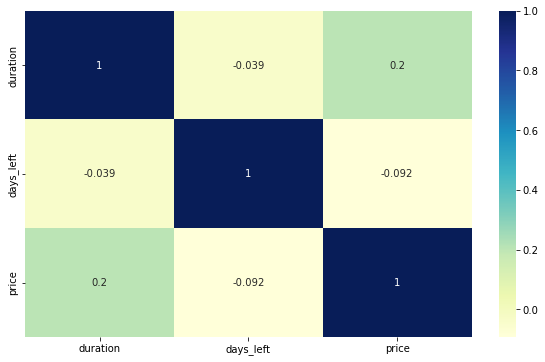

In [14]:
plt.figure(figsize=(10,6))
crltn=Adataset.corr()
sns.heatmap(crltn,annot=True,cmap="YlGnBu")
plt.show()

<AxesSubplot:xlabel='duration', ylabel='price'>

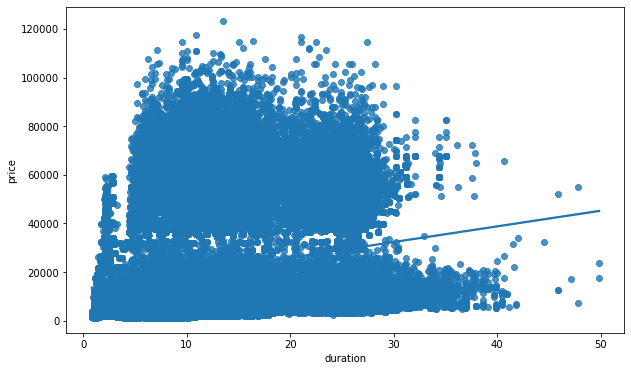

In [15]:
plt.figure(figsize=(10,6))
sns.regplot(x="duration", y="price", data=Adataset)

In [16]:
pearson_coef, p_value = stats.pearsonr(Adataset['duration'], Adataset['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.20419769309028135  with a P-value of P = 0.0


<AxesSubplot:xlabel='days_left', ylabel='price'>

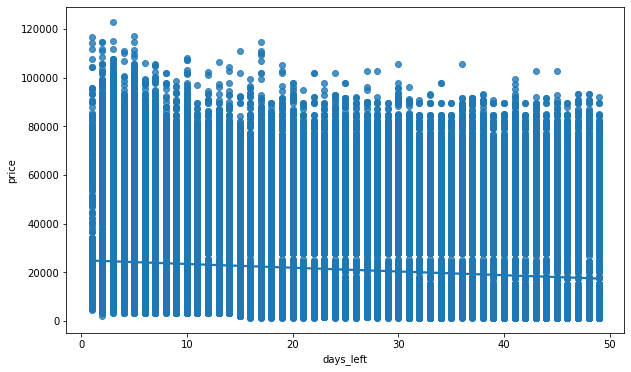

In [17]:
plt.figure(figsize=(10,6))
sns.regplot(x="days_left", y="price", data=Adataset)

In [18]:
pearson_coef, p_value = stats.pearsonr(Adataset['days_left'], Adataset['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.09196618386084518  with a P-value of P = 0.0


<AxesSubplot:xlabel='airline', ylabel='price'>

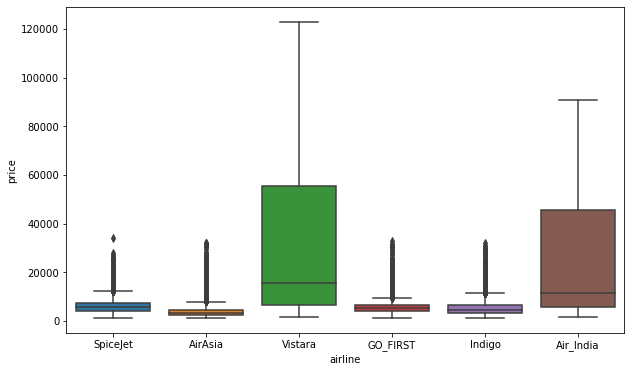

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(x="airline", y="price", data=Adataset)

<AxesSubplot:xlabel='source_city', ylabel='price'>

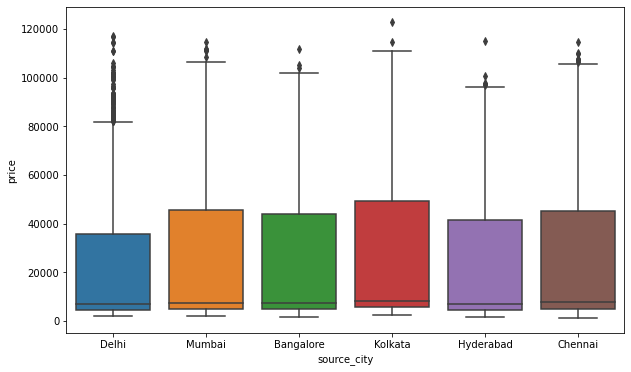

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(x="source_city", y="price", data=Adataset)

<AxesSubplot:xlabel='departure_time', ylabel='price'>

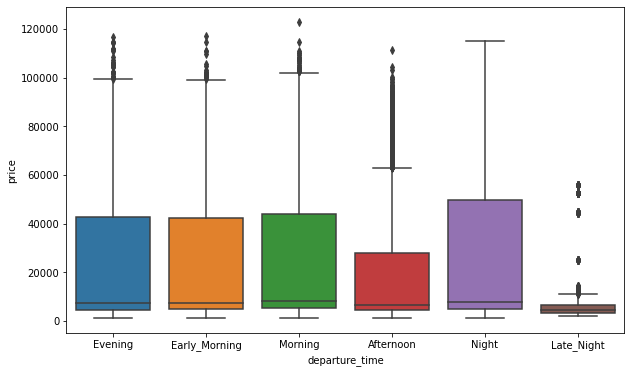

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(x="departure_time", y="price", data=Adataset)

<AxesSubplot:xlabel='stops', ylabel='price'>

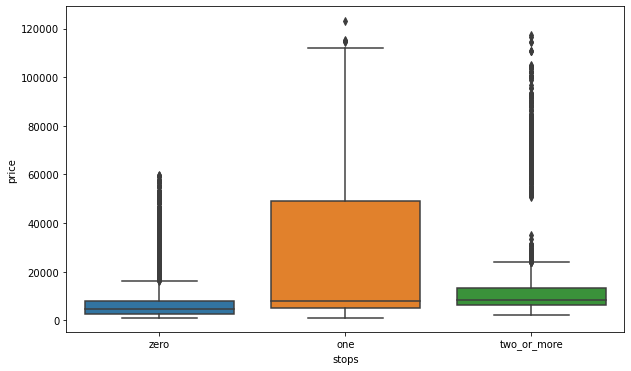

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(x="stops", y="price", data=Adataset)

<AxesSubplot:xlabel='arrival_time', ylabel='price'>

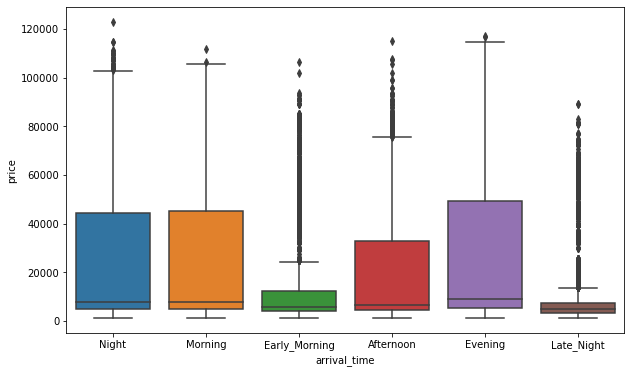

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(x="arrival_time", y="price", data=Adataset)

<AxesSubplot:xlabel='destination_city', ylabel='price'>

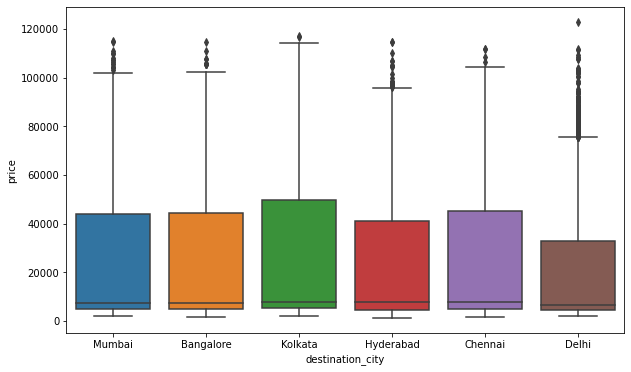

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(x="destination_city", y="price", data=Adataset)

<AxesSubplot:xlabel='class', ylabel='price'>

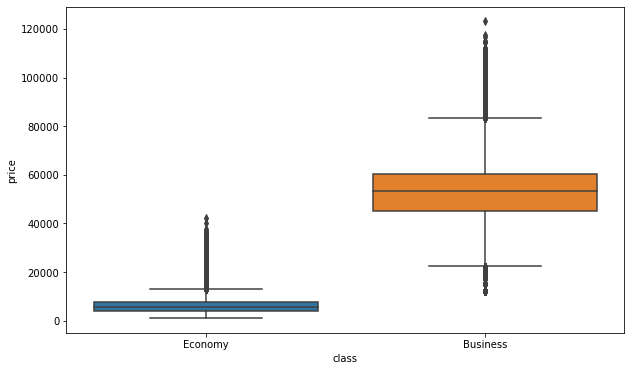

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(x="class", y="price", data=Adataset)

In [43]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
Adataset.airline = labelencoder.fit_transform(Adataset.airline)
Adataset.flight = labelencoder.fit_transform(Adataset.flight)
Adataset.source_city = labelencoder.fit_transform(Adataset.source_city)
Adataset.departure_time = labelencoder.fit_transform(Adataset.departure_time)
Adataset.stops = labelencoder.fit_transform(Adataset.stops)
Adataset.arrival_time = labelencoder.fit_transform(Adataset.arrival_time)
Adataset['class']=labelencoder.fit_transform(Adataset['class'])
Adataset.destination_city = labelencoder.fit_transform(Adataset.destination_city)

In [47]:
Adataset.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955


In [49]:
x=Adataset.iloc[:,0:10]
x

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,4,1408,2,2,2,5,5,1,2.17,1
1,4,1387,2,1,2,4,5,1,2.33,1
2,0,1213,2,1,2,1,5,1,2.17,1
3,5,1559,2,4,2,0,5,1,2.25,1
4,5,1549,2,4,2,4,5,1,2.33,1
...,...,...,...,...,...,...,...,...,...,...
300148,5,1477,1,4,0,2,3,0,10.08,49
300149,5,1481,1,0,0,5,3,0,10.42,49
300150,5,1486,1,1,0,5,3,0,13.83,49
300151,5,1483,1,1,0,2,3,0,10.00,49


In [51]:
y=Adataset.iloc[:,10]
y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300113, dtype: int64

In [54]:
LassoModel=Lasso()

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [56]:
lm=LassoModel.fit(x_train,y_train)

In [57]:
y_predict = lm.predict(x_test)

In [75]:
R1=lm.score(x_train,y_train)
print('The R-square for LASSO regression is: ',R1)

The R-square for LASSO regression is:  0.9043553899775216


In [76]:
mse1=mean_squared_error(y_test, y_predict)
print('The mean squared error for LASSO Regression: ',mse1)

The mean squared error for LASSO Regression:  49054484.045240015


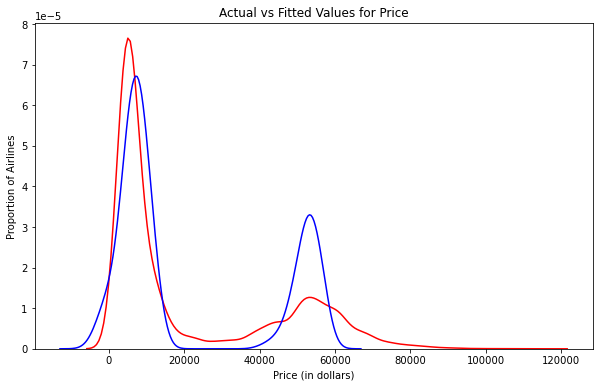

In [60]:
plt.figure(figsize=(10,6))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_predict, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Airlines')

plt.show()
plt.close()

In [61]:
rf = RandomForestRegressor()
model=rf.fit(x_train,y_train)

In [62]:
y_predict2 = rf.predict(x_test)

In [63]:
R2= rf.score(x_train,y_train)
print('The R-square for Random Forest is: ',R2)

The R-square for Random Forest is:  0.9984260453405573


In [77]:
mse2=mean_squared_error(y_test, y_predict2)
print('The mean squared error for Random Forest: ',mse2)

The mean squared error for Random Forest:  5531745.937732088


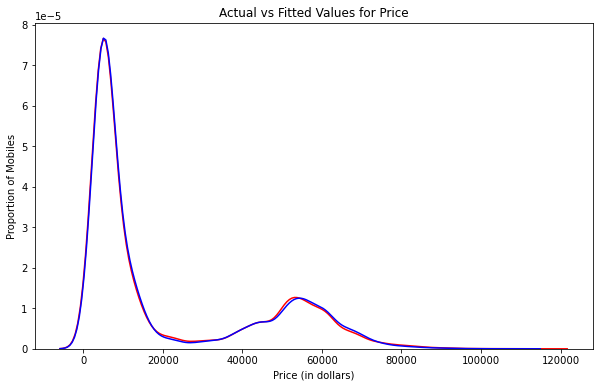

In [65]:
plt.figure(figsize=(10,6))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_predict2, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Mobiles')

plt.show()
plt.close()

In [66]:
models = [('Random Forest', R2, mae2),
          ('LASSO Regression', R1,mae1),
         ]

In [79]:
pred = pd.DataFrame(data = models, columns=['Model', 'R-Square', 'Mean Squared Error'])
pred

,Model,R-Square,Mean Squared Error
0,Random Forest,0.998426,903.025519
1,LASSO Regression,0.904355,4644.780174


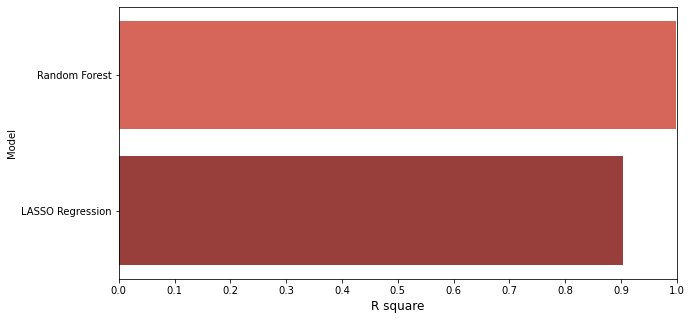

In [80]:
pred.sort_values(by=['R-Square'], ascending=False, inplace=True)

f, axes = plt.subplots(1,figsize=(10,5))

sns.barplot(x='R-Square', y='Model', data = pred, palette='Reds_d', ax = axes)
#axes[0].set(xlabel='Region', ylabel='Charges')
axes.set_xlabel('R square', size=12)
axes.set_ylabel('Model')
axes.set_xlim(0,1.0)
axes.set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

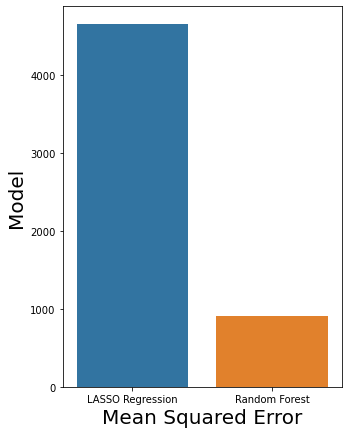

In [81]:
pred.sort_values(by=(['Mean Squared Error']), ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(5,7))
sns.barplot(x = pred['Model'], y=pred['Mean Squared Error'], ax = axe)
axe.set_xlabel('Mean Squared Error', size=20)
axe.set_ylabel('Model', size=20)

plt.show()